In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from shapely.geometry import Point

In [2]:
from Space_Analysis import (First_To_Fire, Ids_in_cluster, is_center, Plot_Ring_Analysis)

In [73]:
#Load data

name   = 'RS'
degree = 100
weight = 30.
std    = 700.
num_neurons = 2000

root      = str('Simulations2/EDRNetworks/' + name + 'neurons/')
                
save_file = str( str(num_neurons) + 'EDR_' + str(degree) + 
                '_lambda' + str(std) + '_weight' + str(weight) )
                
spk_file  = str('Simulations2/EDRNetworks/' + name + 'neurons/' +
                str(num_neurons) + 'EDR_' + str(degree) + 
                '_lambda' + str(std) + '_weight' + str(weight) + '.txt' )

time_bursts = np.load(root + 'time_bursts_' + save_file + '.npy')

return_list = []
with open(spk_file, "r") as fileobject:
    for i, line in enumerate(fileobject):
        if not line.startswith('#'):
            lst = line.rstrip('\n').split(' ')
            return_list.append([int(lst[0]),float(lst[1]),float(lst[2]),float(lst[3])])
NTXY = np.array(sorted(return_list, key = lambda x:x[1]))

senders = NTXY[:,0]
times   = NTXY[:,1]
pos     = NTXY[...,2:]

neurons = set(senders)

In [74]:
#Build the Activity + Position data
activity    = [] # list of size N X number of spike
positions   = [] # Neurons Positions as N X 2 array 

for nn in neurons:
    nspk = np.where(senders == nn)[0]
    tspk = times[nspk]
    activity.append(tspk)
    positions.append(pos[nspk[0]])
    
positions = np.array(positions)

positions.shape, np.array(activity).shape

((2000, 2), (2000,))

<IPython.core.display.Javascript object>


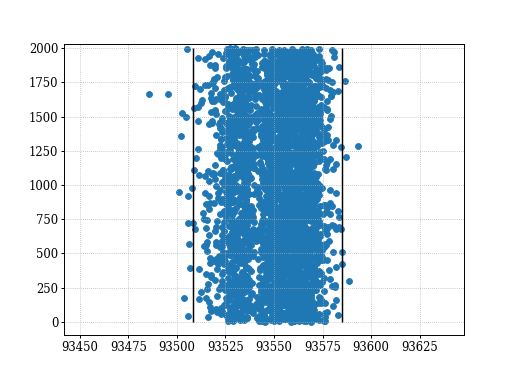

In [75]:
#Plot Raster
f,a = plt.subplots(figsize = (7,5))
a.scatter(times,senders)
burst = 100
a.vlines(time_bursts[burst], [0], [num_neurons])
a.set_xlim([time_bursts[burst-1][0],time_bursts[burst+1][1]])
plt.show()

In [78]:
'''
Paramter for ring analysis
'''
culture_radius = 800.
#Determine the minimal size of the x and y grids.
#Create the 2D grid.
ux = np.unique(positions[:, 0])
uy = np.unique(positions[:, 1])
xx        = np.sort(ux)
yy        = np.sort(uy)

# For the heatmaps
step_ht   = 5.
xstep     = max(0.5*np.min(np.diff(xx)), step_ht)
ystep     = max(0.5*np.min(np.diff(yy)), step_ht)

eps = np.max(xx)/4.
ftf     = First_To_Fire(activity, time_bursts[burst-1][1], time_bursts[burst][0]+15)
pos_ftf = positions[ftf]
NXY     = zip(ftf,pos_ftf[:,0],pos_ftf[:,1])
clt     = Ids_in_cluster(NXY, eps, 4)

# culture
culture = Point([0.,0.]).buffer(culture_radius)

step_buff    = 50
ttime = np.linspace(time_bursts[burst][0]-50, time_bursts[burst][1] + 50, 150)
bmin = np.min([xstep,ystep])
#union of all first hulls
theta_max, theta_min = 90 , 30

hulls = []
for cc in clt.keys():
    to_p = np.array(clt[cc].keys()).astype(int)
    spiked = np.zeros(num_neurons)
    spiked[ftf] = True
    hulls.append(is_center(positions[to_p], positions, spiked))
hulls

set([0])


[None]

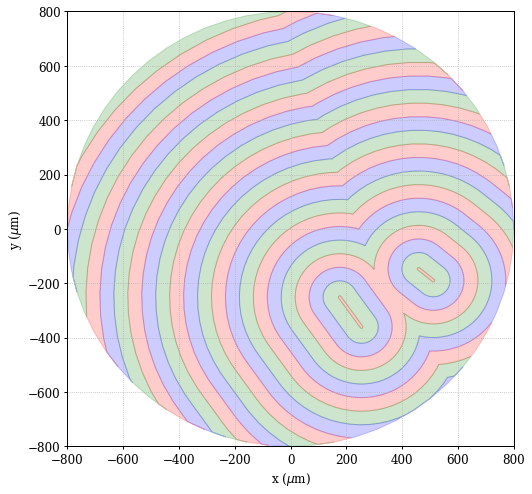

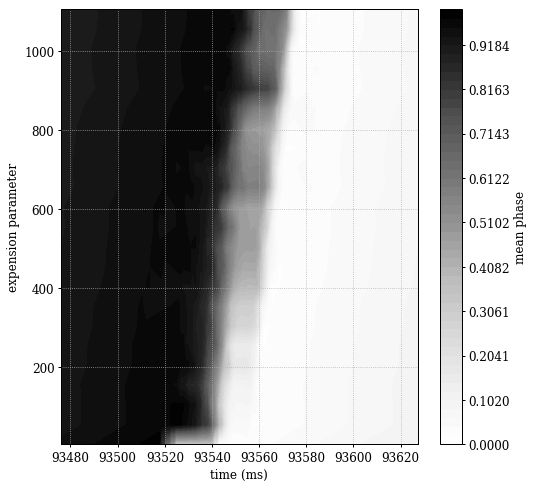

In [62]:
Plot_Ring_Analysis(activity, positions, hulls,  bmin, step_buff, ttime, 
                   culture_radius, phi_lvl = 50, plot_rings = True, 
                   circular = False,
                   dir_segmentation = False, theta_max = theta_max, theta_min = theta_min, 
                   join_clusters = True, plot_neurons = False, kill = 10)

<IPython.core.display.Javascript object>


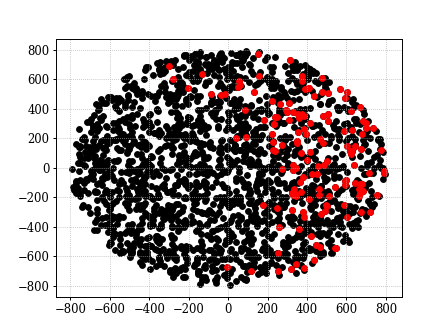

In [79]:
f,a = plt.subplots()
a.scatter(positions[:,0], positions[:,1], color = 'k')
a.scatter(positions[ftf][:,0], positions[ftf][:,1], color = 'r')